<a href="https://colab.research.google.com/github/shriasokan/webacy-web3-security-data-analytics/blob/main/Cluster_Analysis_of_Smart_Contract_Risk_Tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


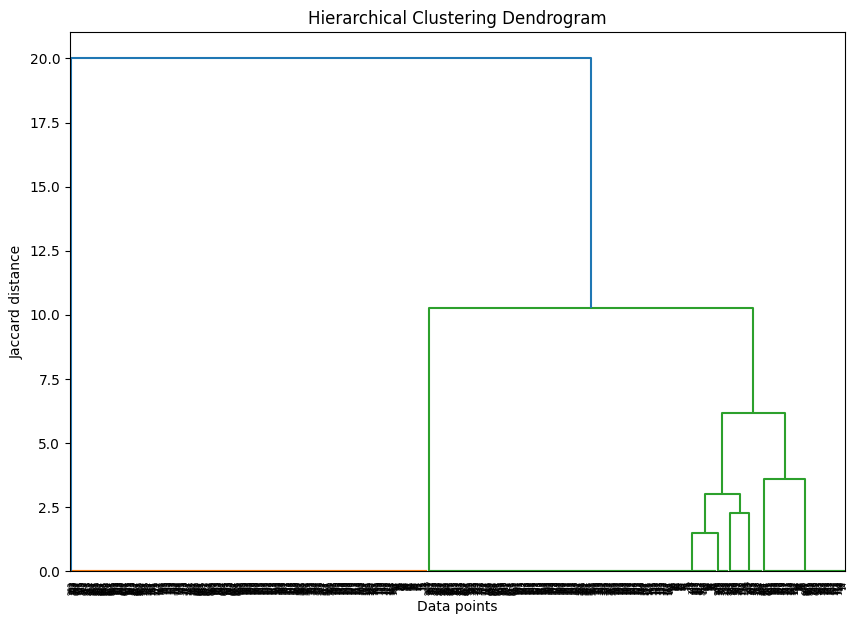

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_excel('/content/drive/My Drive/Webacy Externship/compiled_risk_data.xlsx')
data.head()
data.columns

#Change these based on frequency and correlation analyses
data_new = data.copy()
feature_1 = 'hidden_owner'
feature_2 = 'Is_honeypot'
feature_3 = 'exploitation'

selected_features = data_new[[feature_1, feature_2, feature_3]].replace({True: 1, False: 0})

distance_matrix = pdist(selected_features, 'jaccard')
distance_square_matrix = squareform(distance_matrix)

linkage_matrix = sch.linkage(distance_matrix, method='ward')
linkage_matrix

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Jaccard distance')
plt.show()

In [ ]:
cluster_labels = fcluster(linkage_matrix, t=5, criterion='distance')
data_new['cluster'] = cluster_labels
cluster_summary = data_new[[feature_1, feature_2, feature_3, 'cluster']].groupby('cluster').agg(['mean', 'std', 'median', 'count'])
cluster_summary

,hidden_owner,Is_honeypot,exploitation
cluster,,,
1,0.00000,0.0,0.000000
2,0.00000,0.0,1.000000
3,0.52809,1.0,0.629213
4,1.00000,0.0,0.504854


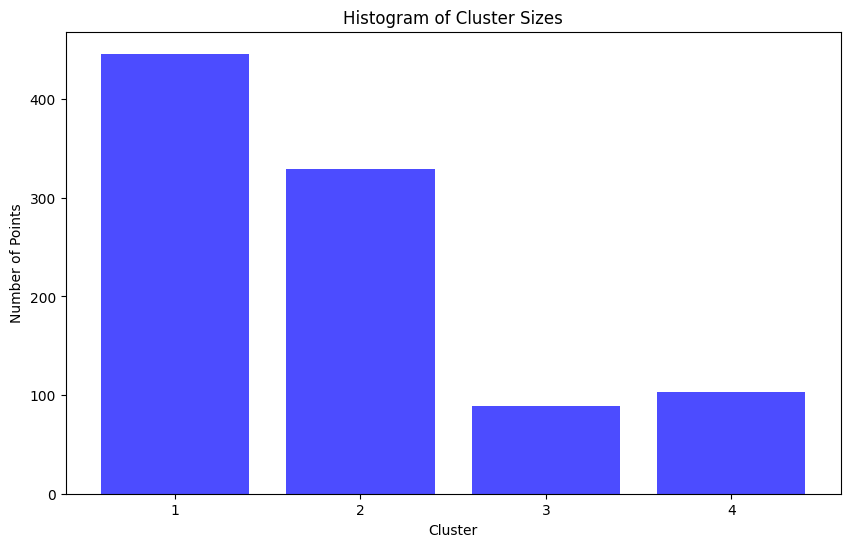

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(cluster_labels, bins=np.arange(1, np.max(cluster_labels)+2)-0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(np.arange(1, np.max(cluster_labels)+1))
plt.show()

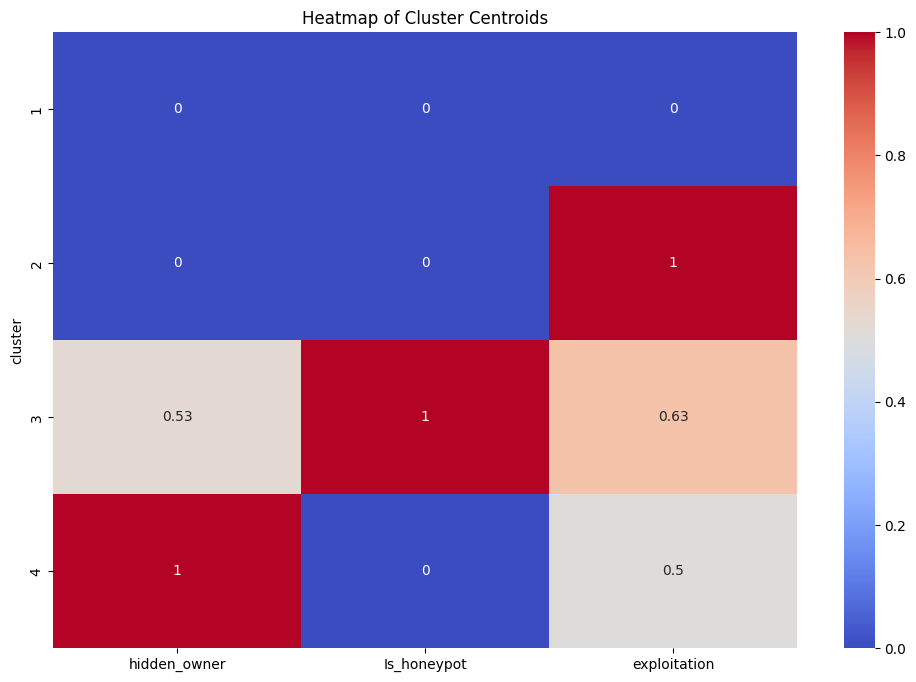

In [ ]:
cluster_centers = data_new[[feature_1, feature_2, feature_3, 'cluster']].groupby('cluster').mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.show()